<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/RNN_For_1D_Colored_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librarys

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense, LSTM, GRU, RNN,SimpleRNN
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from datetime import datetime # for put the time info in each plot          #https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python

## Downloading data

In [3]:
#Monting Google Drive
# https://medium.com/analyatics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07
from google.colab import drive
drive.mount('/content/drive')
#Importing and conifg the Kaggle Drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# Acessing the folder
%cd /content/drive/MyDrive/Kaggle/
# Dowloading NASA data-set
!kaggle datasets download -d luanorionbarana/synthetic-colored-noise
#Unziping data-set
!unzip "synthetic-colored-noise.zip" -d "/content/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Kaggle
synthetic-colored-noise.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  synthetic-colored-noise.zip
replace /content/color.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
ls

kaggle.json  synthetic-colored-noise.zip


In [5]:
#Retorning to Sample folder! NOT NECESSERY
%cd ..
%cd ..
%cd ..

/content/drive/MyDrive
/content/drive
/content


In [6]:
df = pd.read_pickle('color_4series.plk')

## Data Normalization

## Ploting

In [7]:
index = [0,4,9]

Text(0, 0.5, 'Amplitude')

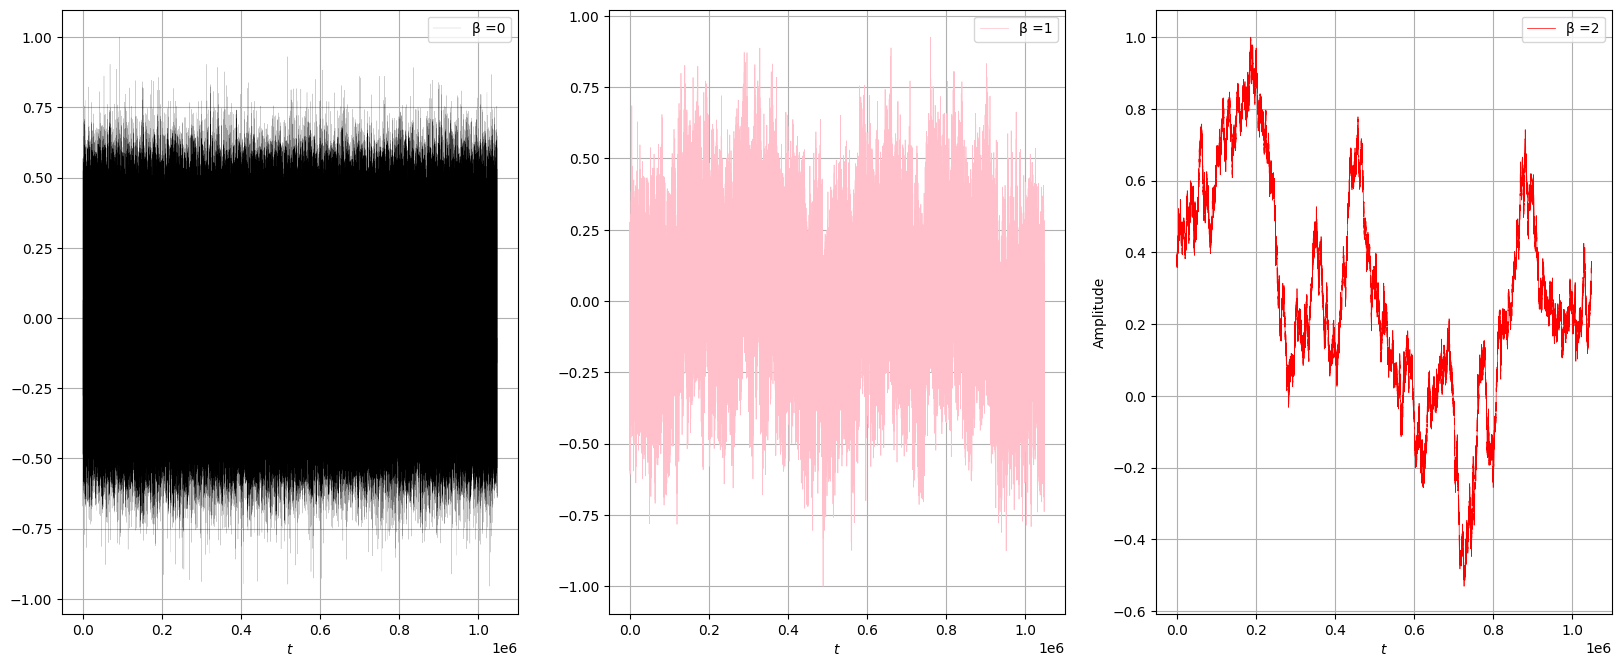

In [ ]:

color = ['black','pink','red']
linewidth = [0.07,0.5,.5]
plt.figure(figsize=(20,8),dpi=100)
for i in range(len(index)):
  plt.subplot(1,3,i+1)
  plt.plot(df.Series[index[i]][:],label='Î² ='+str(df.beta[index[i]]),color=color[i],linewidth=linewidth[i])
  plt.grid()
  plt.legend()
  plt.xlabel('$t$')
plt.ylabel('Amplitude')
  #plt.title(color[i]+ ' noise')
#plt.suptitle('Colored Noise')


# Pre-processing

In [8]:
#serie_index = 0  #white Noise
#serie_index = 40 #pink noise
serie_index =  9#red Noise

min_size , max_size = 0 , len(df.Series[0])

dataframe = pd.DataFrame({"Serie":df['Series'][serie_index][min_size:max_size]})
dataset = dataframe.values.astype('float32')
beta = str(df['beta'][serie_index])

In [9]:
# definindo as amostras de treinamento e teste segundo o hold-out.
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#val_size = 5000
#train, test, val = dataset[0:train_size,:], dataset[train_size:len(dataset),:], dataset[len(dataset):len(dataset)+val_size,:]

In [10]:
# conversÃ£o da sÃ©rie temporal em uma matriz de atributos para regressÃ£o
def create_dataset(dataset, look_back=10):
	'''
  Essa funÃ§Ã£o irÃ¡ criar dois vetores, dataX e dataY, o dataX irÃ¡ conter um conjuntos de nÃºmeros dentro da sÃ©rie temporal
  e o dataY serÃ¡ o seu valor a posteriorÃ­

  Por ex: 
  lista = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  se o look_back for igual a 3 teremos 
  dataX[0] = [0,1,2] ; dataY[0] = [3]
  dataX[1] = [1,2,3] ; dataY[1] = [4]
  dataX[2] = [2,3,4] ; dataY[2] = [5]
  dataX[3] = [3,4,5] ; dataY[3] = [6]
  ...
	'''
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
look_back = 1000
trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test,  look_back)
#valX, valY     = create_dataset(val,   look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1, trainX.shape[1]))
testX =  np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#valX =   np.reshape(valX,  (valX.shape[0],  1, valX.shape[1]))

# Model

In [12]:
#Setting Random seedsðŸŒ±
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(3)

In [14]:
epochs = 100
model_RNN = Sequential()
model_RNN.add(SimpleRNN(4, input_shape=(1, look_back)))
model_RNN.add(Dense(1))
model_RNN.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
history_RNN = model_RNN.fit(trainX, trainY, epochs=epochs, batch_size=len(trainX), verbose=0,validation_split=0.7)

model_LSTM = Sequential()
model_LSTM.add(LSTM(4, input_shape=(1, look_back)))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
history_LSTM = model_LSTM.fit(trainX, trainY, epochs=epochs, batch_size=len(trainX), verbose=0,validation_split=0.7)

model_GRU = Sequential()
model_GRU.add(GRU(4, input_shape=(1, look_back)))
model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
history_GRU = model_GRU.fit(trainX, trainY, epochs=epochs, batch_size=len(trainX), verbose=0,validation_split=0.7)


In [15]:
#Alocationg all the models in vectors!
model = [model_RNN,model_LSTM,model_GRU]
history = [history_RNN,history_LSTM,history_GRU]
model_name = ['RNN','LSTM','GRU']
color = ['C0','C1','C2']

#Allocating metrics
loss, mse, val_loss =[],[],[]
for i in range(len(model)):
  loss.append(history[i].history['loss'])
  mse.append(history[i].history['mse'])
  val_loss.append(history[i].history['val_loss'])

# Model Results

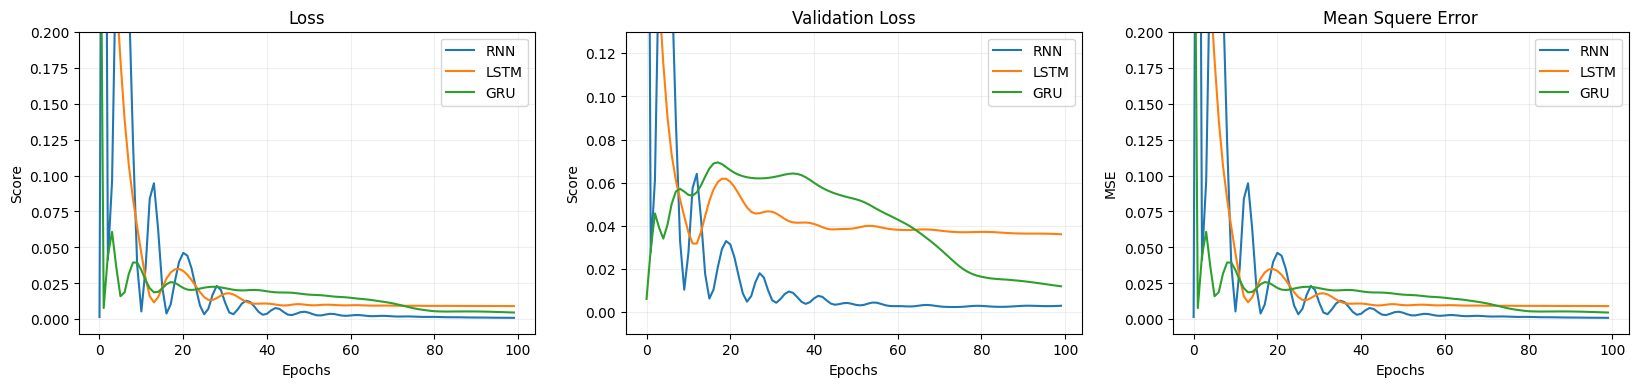

In [16]:
epochs = np.arange(0,len(loss[0]))
plt.figure(figsize=(20, 4),dpi=100)

plt.subplot(1,3,1)
for i in range(len(model)): plt.plot(epochs,loss[i], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.title('Loss')
plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)

plt.subplot(1,3,2)
for i in range(len(model)): plt.plot(epochs,val_loss[i], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.title('Validation Loss')
plt.ylim(-0.01,0.13)
plt.grid(alpha=0.2)


plt.subplot(1,3,3)
for i in range(len(model)): plt.plot(epochs,mse[i], label=model_name[i],  color=color[i], linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean Squere Error")
plt.ylim(-0.01,0.2)
plt.grid(alpha=0.2)

plt.show()

In [20]:
'''
Aqui iremos alocar a previsÃ£o do treinamento, to teste e de ambos em vetores. 
Para o caso dos valores de test eles precisam estar na posiÃ§Ã£o em que o treinamento acaba para que possamos comparar no mesmo dataset
'''

# make predictions
trainPredict, testPredict, trainPredictPlot, testPredictPlot, model_data = [],[],[],[],[]

for i in range(len(model)):
  #Train
  trainPredict.append(model[i].predict(trainX))
  a = np.empty_like(dataset)
  a[:, :] = np.nan
  a[look_back:len(trainPredict[i])+look_back, :] = trainPredict[i]
  trainPredictPlot.append(a)
  #Teste
  testPredict.append(model[i].predict(testX))
  a = np.empty_like(dataset)
  a[:, :] = np.nan
  a[len(trainPredict[i])+(look_back*2)+1:len(dataset)-1, :] = testPredict[i]
  testPredictPlot.append(a)
  #All
  a =  np.empty_like(dataset) #creating a empyt vector
  a[look_back:len(trainPredict[i])+look_back, :] = trainPredict[i] #alocating the the traint data generatead by the model
  a[len(trainPredict[i])+(look_back*2)+1:len(dataset)-1, :] = testPredict[i] #alocating the the test data generatead by the model
  a = (np.reshape(a,(len(a))))
  a[:look_back] = np.nan
  #model_data = model_data[look_back:]
  # Killing divergences
  for i in range(len(a)):
      if a[i] > 1: a[i] = np.nan
      #if a[i] < 0.0001: a[i] = 0
  model_data.append(a)   
del a  


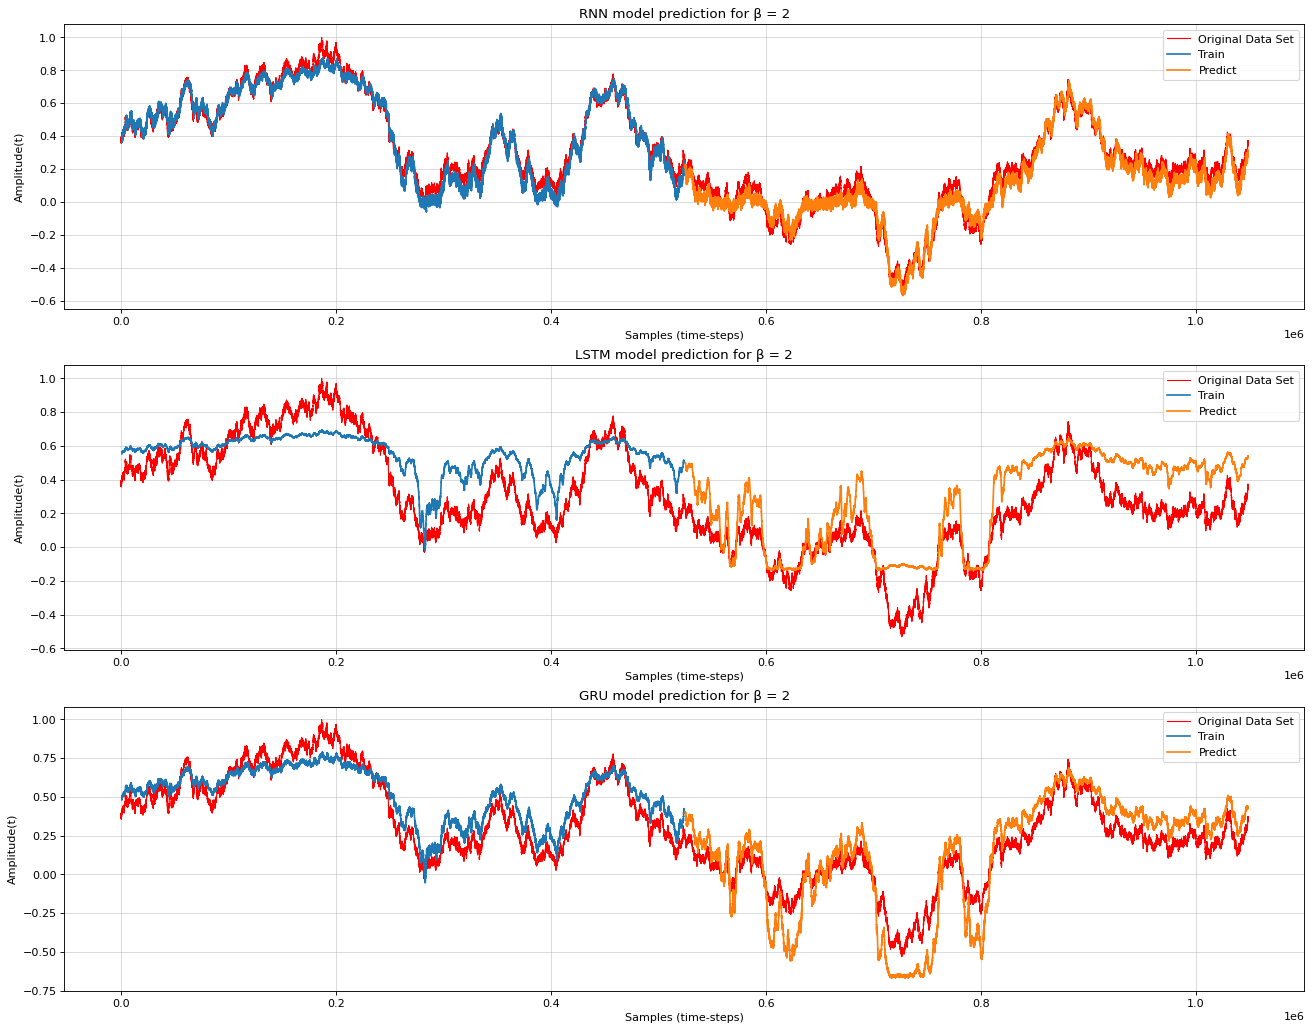

In [18]:
i=2
if   beta == '0.0': df_color = 'black'
elif beta == '1.0': df_color = 'magenta'
else                     : df_color = 'red'

grossura = 0.5 if beta== '0.0' else 1

plt.figure(figsize = (20,4*len(model)+4), dpi=80)
for i in range(len(model)):
  plt.subplot(len(model),1,(i+1))
  plt.plot(dataset,label="Original Data Set",color = df_color,linewidth=grossura)
  plt.plot(trainPredictPlot[i],label='Train',color='C0')
  plt.plot(testPredictPlot[i],label='Predict',color='C1')
  plt.title(str(model_name[i])+' model prediction for Î² = '+str(beta))
  plt.ylabel('Amplitude(t)')
  plt.xlabel('Samples (time-steps)')
  plt.legend()
  plt.grid(alpha=0.5)
plt.show()

In [31]:
#Convertendo os dados para um comprimento mÃ¡ximo de base 2^n de acodo com o tamanho da sÃ©rie em seguida o salvando em um aquivo .csv
pd.DataFrame(dataset[:2**int(np.log2(len(dataset)))]).to_csv("time.csv", index=False, header=False)
pd.DataFrame(model_data[0][:2**int(np.log2(len(model_data)))]).to_csv("model.csv", index=False, header=False)

In [22]:
pd.DataFrame(dataset[:2**int(np.log2(len(dataset)))]).to_csv("time.csv", index=False, header=False)
pd.DataFrame(model_data[0][:2**int(np.log2(len(model_data)))]).to_csv("model.csv", index=False, header=False)

#csv_para_txt
import csv
with open("serie_time.txt", "w") as my_output_file: 
    with open("time.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

with open("model_data.txt", "w") as my_output_file: 
    with open("model.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()
#

In [ ]:
# #Alocating these results in a dataframe
# df_time =  pd.DataFrame(dataset[:2**int(np.log2(len(dataset)))])
# df_model = pd.DataFrame(model_data[:2**int(np.log2(len(model_data)))])

# #Creating and save has a CSV
# df_time.to_csv("time.csv", index=False, header=False)
# df_model.to_csv("model.csv", index=False, header=False)

# #Generate 
# time_series = list(np.reshape(dataset,(1,len(dataset)))[0])
# data_model = list(model_data)
# df_final = pd.DataFrame({"time_series":time_series,"model_data":data_model})

# modelos = 'LSTM' if str(modelo)[-6:-2] else 'GRU'
# #time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_")    
# time = "EOSBF_"
# df_final.to_csv(time+'beta_'+beta+'model_'+modelos+'lookback_'+str(look_back)+'npoins_'+str(max_size+min_size)+".csv")

# #csv_para_txt
# import csv
# with open("serie_time.txt", "w") as my_output_file: 
#     with open("time.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
#     my_output_file.close()

# with open("model_data.txt", "w") as my_output_file: 
#     with open("model.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
#     my_output_file.close()
# #

NameError: ignored

In [37]:
fun(2)

5

In [25]:
############################################################################
# #The following lines its a code provid by Reinaldo Rosa called SpecPlus.
# #the original code is on google colab. Here, is just a resume
############################################################################



def specplus2(nomeArquivo):


    import matplotlib.pyplot as plt
    import matplotlib.mlab as mlab
    from scipy import stats, optimize
    import numpy as np
    import math
    __authors__ = 'Paulo Giovani & Reinaldo Rosa'
    __copyright__ = 'Copyright 2017, 3DBMO Project INPE'
    __credits__ = ['Paulo Giovani', 'Reinaldo Roberto Rosa', 'Murilo da Silva Dantas']
    __license__ = 'GPL'
    __version__ = '0.1B'
    __maintainer__ = 'Paulo Giovani'
    __email__ = 'pg_faria@yahoo.com.br'
    time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_")    
    #---------------------------------------------------------------------
    # Calcula o PSD da sÃ©rie temporal
    #---------------------------------------------------------------------


    pd.DataFrame(nomeArquivo[:2**int(np.log2(len(nomeArquivo)))]).to_csv("time.csv", index=False, header=False)
    #pd.DataFrame(model_data[0][:2**int(np.log2(len(model_data)))]).to_csv("model.csv", index=False, header=False)

    #csv_para_txt
    import csv
    with open("serie_time.txt", "w") as my_output_file: 
        with open("time.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
        my_output_file.close()


    cor = 'black' #if nomeArquivo == 'serie_time.txt' else 'C0'

    titulo =  'Original Time Series Data' #if nomeArquivo == 'serie_time.txt'  else 'Model Time Series Data'



    def psd(data):
        """Calcula o PSD de uma sÃ©rie temporal."""
        # Define um intervalo para realizar o ajuste da reta
        INICIO = 15
        FIM = 6300
        # O vetor com o tempo Ã© o tamanho do nÃºmero de pontos
        N = len(data)
        tempo = np.arange(len(data))
        # Define a frequÃªncia de amostragem
        dt = (tempo[-1] - tempo[0] / (N - 1))
        fs = 1 / dt
        # Calcula o PSD utilizando o MLAB
        power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)
        # Calcula a porcentagem de pontos utilizados na reta de ajuste
        totalFrequencias = len(freqs)
        totalPSD = FIM - INICIO
        porcentagemPSD = int(100 * totalPSD / totalFrequencias)
        # Seleciona os dados dentro do intervalo de seleÃ§Ã£o
        xdata = freqs[INICIO:FIM]
        ydata = power[INICIO:FIM]
        # Simula o erro
        yerr = 0.2 * ydata
        # Define uma funÃ§Ã£o para calcular a Lei de PotÃªncia
        powerlaw = lambda x, amp, index: amp * (x**index)
        # Converte os dados para o formato LOG
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        # Define a funÃ§Ã£o para realizar o ajuste
        fitfunc = lambda p, x: p[0] + p[1] * x
        errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
        logyerr = yerr / ydata
        # Calcula a reta de ajuste
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
        pfinal = out[0]
        covar = out[1]
        index = pfinal[1]
        amp = 10.0 ** pfinal[0]
        indexErr = np.sqrt(covar[0][0])
        ampErr = np.sqrt(covar[1][1]) * amp
        # Retorna os valores obtidos
        return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM

    #---------------------------------------------------------------------
    # Calcula o DFA 1D da sÃ©rie temporal
    #---------------------------------------------------------------------

    def dfa1d(timeSeries, grau):
        """Calcula o DFA 1D (adaptado de Physionet), onde a escala cresce
        de acordo com a variÃ¡vel 'Boxratio'. Retorna o array 'vetoutput', 
        onde a primeira coluna Ã© o log da escala S e a segunda coluna Ã© o
        log da funÃ§Ã£o de flutuaÃ§Ã£o."""
        # 1. A sÃ©rie temporal {Xk} com k = 1, ..., N Ã© integrada na chamada funÃ§Ã£o perfil Y(k)
        x = np.mean(timeSeries)
        timeSeries = timeSeries - x
        yk = np.cumsum(timeSeries)
        tam = len(timeSeries)
        # 2. A sÃ©rie (ou perfil) Y(k) Ã© dividida em N intervalos nÃ£o sobrepostos de tamanho S
        sf = np.ceil(tam / 4).astype(np.int)
        boxratio = np.power(2.0, 1.0 / 8.0)
        vetoutput = np.zeros(shape = (1,2))
        s = 4
        while s <= sf:        
            serie = yk        
            if np.mod(tam, s) != 0:
                l = s * int(np.trunc(tam/s))
                serie = yk[0:l]			
            t = np.arange(s, len(serie), s)
            v = np.array(np.array_split(serie, t))
            l = len(v)
            x = np.arange(1, s + 1)
            # 3. Calcula-se a variÃ¢ncia para cada segmento v = 1,â€¦, n_s:
            p = np.polynomial.polynomial.polyfit(x, v.T, grau)
            yfit = np.polynomial.polynomial.polyval(x, p)
            vetvar = np.var(v - yfit)
    # 4. Calcula-se a funÃ§Ã£o de flutuaÃ§Ã£o DFA como a mÃ©dia das variÃ¢ncias de cada intervalo
            fs = np.sqrt(np.mean(vetvar))
            vetoutput = np.vstack((vetoutput,[s, fs]))
            # A escala S cresce numa sÃ©rie geomÃ©trica
            s = np.ceil(s * boxratio).astype(np.int)
        # Array com o log da escala S e o log da funÃ§Ã£o de flutuaÃ§Ã£o   
        vetoutput = np.log10(vetoutput[1::1,:])
        # Separa as colunas do vetor 'vetoutput'
        x = vetoutput[:,0]
        y = vetoutput[:,1]
        # RegressÃ£o linear
        slope, intercept, _, _, _ = stats.linregress(x, y)
        # Calcula a reta de inclinaÃ§Ã£o
        predict_y = intercept + slope * x
        # Calcula o erro
        pred_error = y - predict_y
        # Retorna o valor do ALFA, o vetor 'vetoutput', os vetores X e Y,
        # o vetor com os valores da reta de inclinaÃ§Ã£o e o vetor de erros
        return slope, vetoutput, x, y, predict_y, pred_error
    #---------------------------------------------------------------------
    # Trecho principal
    #---------------------------------------------------------------------
    def main():
        """FunÃ§Ã£o com o cÃ³digo principal do programa."""
        #print("\nSpectral Analysis for time series...\n")
        # Desabilita as mensagens de erro do Numpy (warnings)
        old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
        # Carrega o arquivo de dados
        #nomeArquivo = 'serie1.txt'		
        data = np.genfromtxt(nomeArquivo,
                             delimiter = ',',
                             dtype = 'float32',
                             filling_values = 0)
        # Exibe os primeiro N valores do arquivo
        N = 10
        #print("Original time series data (%d points): \n" %(len(data)))
        #print("First %d points: %s\n" %(N, data[0:10]))
        #print()
        #-----------------------------------------------------------------
        # ParÃ¢metros gerais de plotagem
        #-----------------------------------------------------------------
        # Define os subplots
        fig = plt.figure(figsize=(6,4), dpi=100)
        fig.subplots_adjust(hspace = .4, wspace = .2)
        # Tamanho das fontes
        tamanhoFonteEixoX     = 16
        tamanhoFonteEixoY     = 20
        tamanhoFonteTitulo    = 16
        tamanhoFontePrincipal = 25
        # TÃ­tulo principal
        tituloPrincipal = 'Time Series Spectral Analysis' 	
        #-----------------------------------------------------------------
        # Plotagem da sÃ©rie original
        #-----------------------------------------------------------------
        # Define as cores da plotagem
        corSerieOriginal = cor# 'r'
        # TÃ­tulo dos eixos da sÃ©rie original
        textoEixoX = 'Time'
        textoEixoY = 'Amplitude'
        textoTituloOriginal = titulo
        #print("1. Plotting time series data...")
        # Plotagem da sÃ©rie de dados    
        #O = fig.add_subplot(1, 3, 1)    
        # O = fig.add_subplot(2, 1, 1)
        # O.plot(data, '-', color = corSerieOriginal)
        # O.set_title(textoTituloOriginal, fontsize = tamanhoFonteTitulo)
        # O.set_xlabel(textoEixoX, fontsize = tamanhoFonteEixoX)
        # O.set_ylabel(textoEixoY, fontsize = tamanhoFonteEixoY)
        # O.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
        # O.grid()
        #-----------------------------------------------------------------
        # CÃ¡lculo e plotagem do PSD                                     --
        #-----------------------------------------------------------------
        # Calcula o PSD
        freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)
        # O valor do beta equivale ao index
        b = index
        # Define as cores da plotagem
        corPSD1 = 'k'
        #corPSD2 =  'orange' if modelo_nome == 'GRU' else 'green'
        corPSD2 =  'navy' if nomeArquivo == 'serie_time.txt' else 'orange' if modelo_nome == 'GRU' else 'green'
        # TÃ­tulo dos eixos do PSD
        textoPSDX = 'Frequency (Hz)'
        textoPSDY = 'PSD'
        #textoTituloPSD = r''+str(modelo_nome)+' - PSD Estimation Î² = '
        textoTituloPSD = r'Original Time Series - PSD Estimation Î² = ' if nomeArquivo == 'serie_time.txt' else r'GRU - PSD Estimation Î² = ' if modelo_nome == 'GRU' else r'LSTM - PSD Estimation Î² = '
        #print("2. Plotting Power Spectrum Density...")
        # Plotagem do PSD    
        PSD = fig.add_subplot(2, 2, (1,4))    
        PSD.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
        PSD.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
        PSD.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
        PSD.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
        PSD.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
        PSD.set_xlabel(textoPSDX                                  )#, fontsize = tamanhoFonteEixoX)
        PSD.set_ylabel(textoPSDY                                  )#, fontsize = tamanhoFonteEixoY)
        PSD.set_title(textoTituloPSD + '%.4f' %(b), loc = 'center')#, fontsize = tamanhoFonteTitulo)
        PSD.set_yscale('log')
        PSD.set_xscale('log')
        PSD.grid() 
        #-----------------------------------------------------------------
        # CÃ¡lculo e plotagem do DFA
        #-----------------------------------------------------------------
        # Calcula o DFA 1D
        alfa, vetoutput, x, y, reta, erro = dfa1d(data, 1)
        # Verifica se o DFA possui um valor vÃ¡lido
        # Em caso afirmativo, faz a plotagem
        # if not math.isnan(alfa):
        # 	# Define as cores da plotagem
        # 	corDFA = 'darkmagenta'
        # 	# TÃ­tulo dos eixos do DFA
        # 	textoDFAX = '$log_{10}$ (s)'
        # 	textoDFAY = '$log_{10}$ F(s)'
        # 	textoTituloDFA = r'Detrended Fluctuation Analysis $\alpha$ = '
        # 	print("3. Plotting Detrended Fluctuation Analysis...")
        # 	# Plotagem do DFA 
        # 	DFA = fig.add_subplot(2, 2, 4)    
        # 	DFA.plot(x, y, 's', 
        # 			 color = corDFA, 
        # 			 markersize = 4
        # 			 markeredgecolor = 'r',
        # 			 markerfacecolor = 'None',
        # 			 alpha = 0.8)				 
        # 	DFA.plot(x, reta, '-', color = corDFA, linewidth = 1.5)
        # 	DFA.set_title(textoTituloDFA + '%.4f' %(alfa), loc = 'center', fontsize = tamanhoFonteTitulo)
        # 	DFA.set_xlabel(textoDFAX, fontsize = tamanhoFonteEixoX)
        # 	DFA.set_ylabel(textoDFAY, fontsize = tamanhoFonteEixoY)
        # 	DFA.grid()
        # else:  
        # 	DFA = fig.add_subplot(2, 2, 4)
        # 	DFA.set_title(textoTituloDFA + 'N.A.', loc = 'center', fontsize = tamanhoFonteTitulo)
        # 	DFA.grid()
        #-----------------------------------------------------------------
        # Exibe e salva a figura
        #-----------------------------------------------------------------
        #plt.suptitle(tituloPrincipal, fontsize = tamanhoFontePrincipal)
        time = "EOSBF_"
        #nomeImagem = beta+modelo_nome+time+nomeArquivo+'ANALYSIS_PSD_DFA_.png'
        nomeImagem = beta+'_'+modelo_nome+nomeArquivo+'_PSD.png'
        fig.set_size_inches(7, 4)
        plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)	
        plt.show()
    #---------------------------------------------------------------------
    # Trecho principal
    #---------------------------------------------------------------------
    if __name__ == "__main__":
        main()
    #â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”

In [27]:
############################################################################
# #The following lines its a code provid by Reinaldo Rosa called SpecPlus.
# #the original code is on google colab. Here, is just a resume
############################################################################



def specplus(nomeArquivo):
    cor = 'black' if nomeArquivo == 'serie_time.txt' else 'C0'

    titulo =  'Original Time Series Data' if nomeArquivo == 'serie_time.txt'  else 'Model Time Series Data'


    import matplotlib.pyplot as plt
    import matplotlib.mlab as mlab
    from scipy import stats, optimize
    import numpy as np
    import math
    __authors__ = 'Paulo Giovani & Reinaldo Rosa'
    __copyright__ = 'Copyright 2017, 3DBMO Project INPE'
    __credits__ = ['Paulo Giovani', 'Reinaldo Roberto Rosa', 'Murilo da Silva Dantas']
    __license__ = 'GPL'
    __version__ = '0.1B'
    __maintainer__ = 'Paulo Giovani'
    __email__ = 'pg_faria@yahoo.com.br'
    time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_")    
    #---------------------------------------------------------------------
    # Calcula o PSD da sÃ©rie temporal
    #---------------------------------------------------------------------
    def psd(data):
        """Calcula o PSD de uma sÃ©rie temporal."""
        # Define um intervalo para realizar o ajuste da reta
        INICIO = 0
        FIM = int(len(data))
        # O vetor com o tempo Ã© o tamanho do nÃºmero de pontos
        N = len(data)
        tempo = np.arange(len(data))
        # Define a frequÃªncia de amostragem
        dt = (tempo[-1] - tempo[0] / (N - 1))
        fs = 1 / dt
        # Calcula o PSD utilizando o MLAB
        power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)
        # Calcula a porcentagem de pontos utilizados na reta de ajuste
        totalFrequencias = len(freqs)
        totalPSD = FIM - INICIO
        porcentagemPSD = int(100 * totalPSD / totalFrequencias)
        # Seleciona os dados dentro do intervalo de seleÃ§Ã£o
        xdata = freqs[INICIO:FIM]
        ydata = power[INICIO:FIM]
        # Simula o erro
        yerr = 0.2 * ydata
        # Define uma funÃ§Ã£o para calcular a Lei de PotÃªncia
        powerlaw = lambda x, amp, index: amp * (x**index)
        # Converte os dados para o formato LOG
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        # Define a funÃ§Ã£o para realizar o ajuste
        fitfunc = lambda p, x: p[0] + p[1] * x
        errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
        logyerr = yerr / ydata
        # Calcula a reta de ajuste
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
        pfinal = out[0]
        covar = out[1]
        index = pfinal[1]
        amp = 10.0 ** pfinal[0]
        indexErr = np.sqrt(covar[0][0])
        ampErr = np.sqrt(covar[1][1]) * amp
        # Retorna os valores obtidos
        return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM

    #---------------------------------------------------------------------
    # Calcula o DFA 1D da sÃ©rie temporal
    #---------------------------------------------------------------------

    def dfa1d(timeSeries, grau):
        """Calcula o DFA 1D (adaptado de Physionet), onde a escala cresce
        de acordo com a variÃ¡vel 'Boxratio'. Retorna o array 'vetoutput', 
        onde a primeira coluna Ã© o log da escala S e a segunda coluna Ã© o
        log da funÃ§Ã£o de flutuaÃ§Ã£o."""
        # 1. A sÃ©rie temporal {Xk} com k = 1, ..., N Ã© integrada na chamada funÃ§Ã£o perfil Y(k)
        x = np.mean(timeSeries)
        timeSeries = timeSeries - x
        yk = np.cumsum(timeSeries)
        tam = len(timeSeries)
        # 2. A sÃ©rie (ou perfil) Y(k) Ã© dividida em N intervalos nÃ£o sobrepostos de tamanho S
        sf = np.ceil(tam / 4).astype(np.int)
        boxratio = np.power(2.0, 1.0 / 8.0)
        vetoutput = np.zeros(shape = (1,2))
        s = 4
        while s <= sf:        
            serie = yk        
            if np.mod(tam, s) != 0:
                l = s * int(np.trunc(tam/s))
                serie = yk[0:l]			
            t = np.arange(s, len(serie), s)
            v = np.array(np.array_split(serie, t))
            l = len(v)
            x = np.arange(1, s + 1)
            # 3. Calcula-se a variÃ¢ncia para cada segmento v = 1,â€¦, n_s:
            p = np.polynomial.polynomial.polyfit(x, v.T, grau)
            yfit = np.polynomial.polynomial.polyval(x, p)
            vetvar = np.var(v - yfit)
    # 4. Calcula-se a funÃ§Ã£o de flutuaÃ§Ã£o DFA como a mÃ©dia das variÃ¢ncias de cada intervalo
            fs = np.sqrt(np.mean(vetvar))
            vetoutput = np.vstack((vetoutput,[s, fs]))
            # A escala S cresce numa sÃ©rie geomÃ©trica
            s = np.ceil(s * boxratio).astype(np.int)
        # Array com o log da escala S e o log da funÃ§Ã£o de flutuaÃ§Ã£o   
        vetoutput = np.log10(vetoutput[1::1,:])
        # Separa as colunas do vetor 'vetoutput'
        x = vetoutput[:,0]
        y = vetoutput[:,1]
        # RegressÃ£o linear
        slope, intercept, _, _, _ = stats.linregress(x, y)
        # Calcula a reta de inclinaÃ§Ã£o
        predict_y = intercept + slope * x
        # Calcula o erro
        pred_error = y - predict_y
        # Retorna o valor do ALFA, o vetor 'vetoutput', os vetores X e Y,
        # o vetor com os valores da reta de inclinaÃ§Ã£o e o vetor de erros
        return slope, vetoutput, x, y, predict_y, pred_error
    #---------------------------------------------------------------------
    # Trecho principal
    #---------------------------------------------------------------------
    def main():
        """FunÃ§Ã£o com o cÃ³digo principal do programa."""
        #print("\nSpectral Analysis for time series...\n")
        # Desabilita as mensagens de erro do Numpy (warnings)
        old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
        # Carrega o arquivo de dados
        #nomeArquivo = 'serie1.txt'		
        data = np.genfromtxt(nomeArquivo,
                             delimiter = ',',
                             dtype = 'float32',
                             filling_values = 0)
        # Exibe os primeiro N valores do arquivo
        N = 10
        #print("Original time series data (%d points): \n" %(len(data)))
        #print("First %d points: %s\n" %(N, data[0:10]))
        #print()
        #-----------------------------------------------------------------
        # ParÃ¢metros gerais de plotagem
        #-----------------------------------------------------------------
        # Define os subplots
        fig = plt.figure(figsize=(6,4), dpi=100)
        fig.subplots_adjust(hspace = .4, wspace = .2)
        # Tamanho das fontes
        tamanhoFonteEixoX     = 16
        tamanhoFonteEixoY     = 20
        tamanhoFonteTitulo    = 16
        tamanhoFontePrincipal = 25
        # TÃ­tulo principal
        tituloPrincipal = 'Time Series Spectral Analysis' 	
        #-----------------------------------------------------------------
        # Plotagem da sÃ©rie original
        #-----------------------------------------------------------------
        # Define as cores da plotagem
        corSerieOriginal = cor# 'r'
        # TÃ­tulo dos eixos da sÃ©rie original
        textoEixoX = 'Time'
        textoEixoY = 'Amplitude'
        textoTituloOriginal = titulo
        #print("1. Plotting time series data...")
        # Plotagem da sÃ©rie de dados    
        #O = fig.add_subplot(1, 3, 1)    
        # O = fig.add_subplot(2, 1, 1)
        # O.plot(data, '-', color = corSerieOriginal)
        # O.set_title(textoTituloOriginal, fontsize = tamanhoFonteTitulo)
        # O.set_xlabel(textoEixoX, fontsize = tamanhoFonteEixoX)
        # O.set_ylabel(textoEixoY, fontsize = tamanhoFonteEixoY)
        # O.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
        # O.grid()
        #-----------------------------------------------------------------
        # CÃ¡lculo e plotagem do PSD                                     --
        #-----------------------------------------------------------------
        # Calcula o PSD
        freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)
        # O valor do beta equivale ao index
        b = index
        # Define as cores da plotagem
        corPSD1 = 'k'
        #corPSD2 =  'orange' if modelo_nome == 'GRU' else 'green'
        corPSD2 =  'navy' if nomeArquivo == 'serie_time.txt' else 'orange' if modelo_nome == 'GRU' else 'green'
        # TÃ­tulo dos eixos do PSD
        textoPSDX = 'Frequency (Hz)'
        textoPSDY = 'PSD'
        #textoTituloPSD = r''+str(modelo_nome)+' - PSD Estimation Î² = '
        textoTituloPSD = r'Original Time Series - PSD Estimation Î² = ' if nomeArquivo == 'serie_time.txt' else r'GRU - PSD Estimation Î² = ' if modelo_nome == 'GRU' else r'LSTM - PSD Estimation Î² = '
        #print("2. Plotting Power Spectrum Density...")
        # Plotagem do PSD    
        PSD = fig.add_subplot(2, 2, (1,4))    
        PSD.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
        PSD.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
        PSD.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
        PSD.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
        PSD.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
        PSD.set_xlabel(textoPSDX                                  )#, fontsize = tamanhoFonteEixoX)
        PSD.set_ylabel(textoPSDY                                  )#, fontsize = tamanhoFonteEixoY)
        PSD.set_title(textoTituloPSD + '%.4f' %(b), loc = 'center')#, fontsize = tamanhoFonteTitulo)
        PSD.set_yscale('log')
        PSD.set_xscale('log')
        PSD.grid() 
        #-----------------------------------------------------------------
        # CÃ¡lculo e plotagem do DFA
        #-----------------------------------------------------------------
        # Calcula o DFA 1D
        alfa, vetoutput, x, y, reta, erro = dfa1d(data, 1)
        # Verifica se o DFA possui um valor vÃ¡lido
        # Em caso afirmativo, faz a plotagem
        # if not math.isnan(alfa):
        # 	# Define as cores da plotagem
        # 	corDFA = 'darkmagenta'
        # 	# TÃ­tulo dos eixos do DFA
        # 	textoDFAX = '$log_{10}$ (s)'
        # 	textoDFAY = '$log_{10}$ F(s)'
        # 	textoTituloDFA = r'Detrended Fluctuation Analysis $\alpha$ = '
        # 	print("3. Plotting Detrended Fluctuation Analysis...")
        # 	# Plotagem do DFA 
        # 	DFA = fig.add_subplot(2, 2, 4)    
        # 	DFA.plot(x, y, 's', 
        # 			 color = corDFA, 
        # 			 markersize = 4
        # 			 markeredgecolor = 'r',
        # 			 markerfacecolor = 'None',
        # 			 alpha = 0.8)				 
        # 	DFA.plot(x, reta, '-', color = corDFA, linewidth = 1.5)
        # 	DFA.set_title(textoTituloDFA + '%.4f' %(alfa), loc = 'center', fontsize = tamanhoFonteTitulo)
        # 	DFA.set_xlabel(textoDFAX, fontsize = tamanhoFonteEixoX)
        # 	DFA.set_ylabel(textoDFAY, fontsize = tamanhoFonteEixoY)
        # 	DFA.grid()
        # else:  
        # 	DFA = fig.add_subplot(2, 2, 4)
        # 	DFA.set_title(textoTituloDFA + 'N.A.', loc = 'center', fontsize = tamanhoFonteTitulo)
        # 	DFA.grid()
        #-----------------------------------------------------------------
        # Exibe e salva a figura
        #-----------------------------------------------------------------
        #plt.suptitle(tituloPrincipal, fontsize = tamanhoFontePrincipal)
        time = "EOSBF_"
        #nomeImagem = beta+modelo_nome+time+nomeArquivo+'ANALYSIS_PSD_DFA_.png'
        nomeImagem = beta+'_'+modelo_nome+nomeArquivo+'_PSD.png'
        fig.set_size_inches(7, 4)
        plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)	
        plt.show()
    #---------------------------------------------------------------------
    # Trecho principal
    #---------------------------------------------------------------------
    if __name__ == "__main__":
        main()
    #â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”â€”

In [28]:
specplus2(dataframe)

TypeError: ignored

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

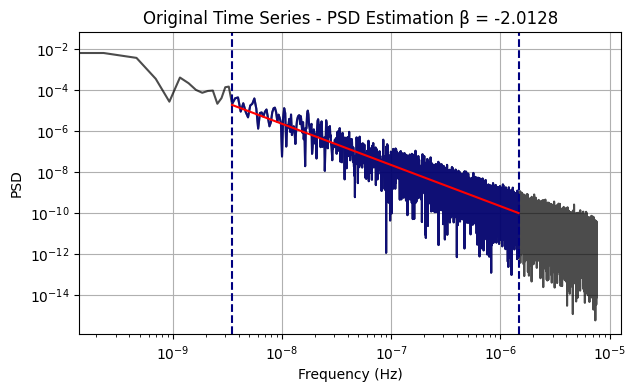

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

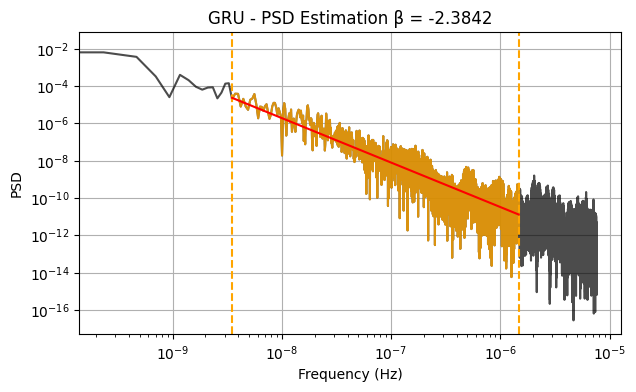

None


In [ ]:
print(specplus('serie_time.txt'))
print(specplus('model_data.txt'))

In [ ]:
#remove all
#!rm *

rm: cannot remove 'sample_data': Is a directory


In [ ]:
#Ziping Data for downloadðŸ“¦
#!zip -r /content/All_Files.zip /content

# Implement LSTM RNN Models For Univariate Time Series Forecasting

https://www.youtube.com/watch?v=UbvkhuqVqUI&t=154s

https://github.com/krishnaik06/Time-Series-Forecasting/blob/master/UnivariateTimeSeries.ipynb